# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhamad Naufal Al Ghani
- **Email:** alghani63@gmail.com
- **ID Dicoding:** al_ghani

## Menentukan Pertanyaan Bisnis

- Bagaimana tren total penyewaan sepeda untuk setiap bulan nya?
- Bagaimana tren total penyewaan sepeda untuk setiap jam nya?
- Pada musim apa total penyewaan sepeda paling banyak dan paling sedikit?
- Bagiamana perbandingan total penyewaan sepedah pada holiday, workday, dan juga weekend

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import to_datetime
from matplotlib.ticker import FuncFormatter


## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("D:\Document\PROYEK\Dicoding\Analisis-Data-Python\proyek\data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("D:\Document\PROYEK\Dicoding\Analisis-Data-Python\proyek\data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset ini berisikan informasi mengenai rental sepedah dari tahun 2011 sampai dengan tahun 2012.
- Pada dataset ini terdapat 2 data yaitu data yang beirisikan informasi mengenai rental sepedah berdasarkan hari dan berdsarkan jam.
- Perbedaan kedua data ini hanya pada column **hr** saja. Di hour_df ada data **hr** sedangkan di day_df tidak ada

### Assessing Data

##### Menilai tabel `day_df`

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Menilai tabel `hour_df`

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terlihat pada output dari code `.info()` terdapat kesalahan tipe data untuk column dteday. Kolom tersebut seharusnya direpresentasikan sebagai tipe data **datetime** bukan **object** (ini digunakan untuk tipe data string).
- Terlihat pada output dari code `.duplicated().sum()` bahwa kedua tabel tidak memiliki data yang duplikat.
- Terlihat pada output dari code `.describe()` bahwa kedua tabel tidak terdapat keanehan nilai 

### Cleaning Data

Berdasarkan hasil dari proses "Assessing Data", tabel `day_df` dan tabel `hour_df` hanya memiliki satu kesalahan yang sama yaitu kesalahan tipe data pada column **dteday**. Maka dari itu dilakukan perubahan data pada column **dteday** menjadi tipe datetime sebagai berikut

In [11]:
tabel_list = [day_df, hour_df]

for tabel in tabel_list:
    tabel["dteday"] = to_datetime(tabel["dteday"])

##### Cek Hasil Cleansing Date_DF

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Cek Hasil Cleansing Hour_DF

In [13]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Sesudah dilakukan proses cleansing, maka kedua tabel sudah memiliki semua nilai data ynag diharapkan

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [15]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
107,108,2011-04-18,2,0,4,0,1,1,1,0.512500,0.503146,0.542500,0.163567,669,2760,3429
190,191,2011-07-10,3,0,7,0,0,0,1,0.747500,0.690025,0.578333,0.183471,1743,3138,4881
315,316,2011-11-12,4,0,11,0,6,0,1,0.356667,0.357942,0.552917,0.212062,1275,2792,4067
714,715,2012-12-15,4,1,12,0,6,0,1,0.324167,0.338383,0.650417,0.106350,767,4280,5047
397,398,2012-02-02,1,1,2,0,4,1,2,0.399167,0.398971,0.672917,0.187187,190,3571,3761


In [16]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [18]:
day_df.instant.is_unique


True

In [20]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [21]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

season
3    188
2    184
1    181
4    178
Name: instant, dtype: int64

In [ ]:
# Penjelasan kolom
# holiday: Apakah hari tersebut adalah hari libur (1: ya, 0: tidak)
# weekday: Hari dalam seminggu (0: Minggu, 1: Senin, ..., 6: Sabtu)
# workingday: Jika bukan akhir pekan atau hari libur, maka 1; jika tidak, 0

# Menentukan kategori hari
conditions = [
    (day_df['holiday'] == 1),  # Hari libur
    ((day_df['weekday'] >= 1) & (day_df['weekday'] <= 6) & (day_df['holiday'] == 0)),  # Weekday (Senin-Sabtu, bukan libur)
    ((day_df['weekday'] == 0) | (day_df['weekday'] == 6)) & (day_df['holiday'] == 0)  # Weekend (Minggu/Sabtu, bukan libur)
]

labels = ['Holiday', 'Weekday', 'Weekend']
day_df['day_type'] = np.select(conditions, labels, default='Other')

# Menghitung jumlah penyewaan berdasarkan kategori hari
rental_counts = day_df.groupby('day_type')['cnt'].sum()

rental_counts


day_type
Holiday      78435
Weekday    2770217
Weekend     444027
Name: cnt, dtype: int64

### Explore `hour_df`

In [32]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7814,7815,2011-11-27,4,0,11,5,0,0,0,1,0.36,0.3485,0.87,0.1940,0,5,5
14582,14583,2012-09-04,3,1,9,19,0,2,1,1,0.76,0.7273,0.70,0.2239,50,502,552
13040,13041,2012-07-02,3,1,7,13,0,1,1,1,0.86,0.7576,0.34,0.2239,74,162,236
14833,14834,2012-09-15,3,1,9,6,0,6,0,1,0.54,0.5152,0.49,0.4179,6,27,33
3297,3298,2011-05-22,2,0,5,7,0,0,0,1,0.54,0.5152,0.88,0.1045,13,27,40


In [33]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [42]:
hour_df.groupby(by="hr").instant.nunique().sort_values(ascending=False)

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren total penyewaan sepeda untuk setiap bulan nya?

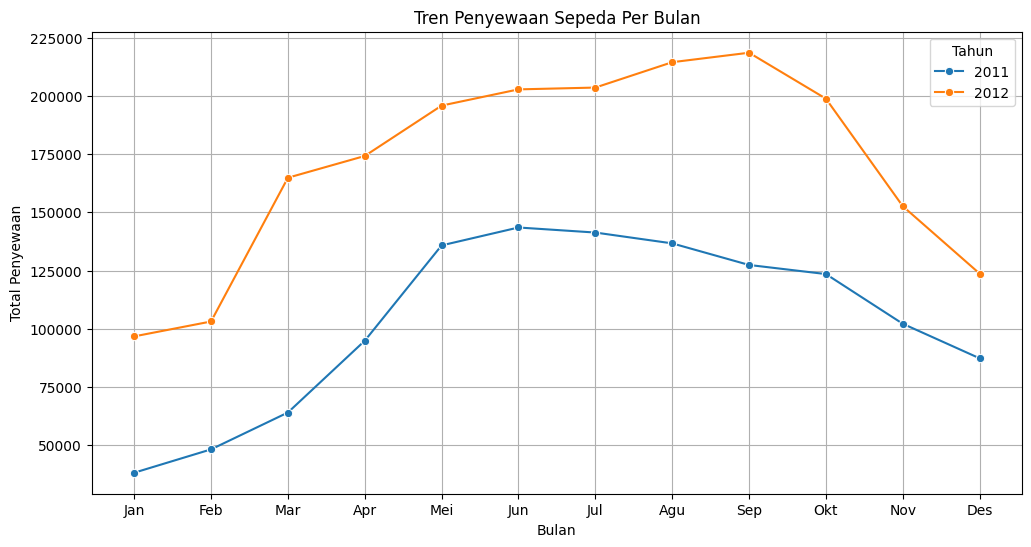

In [57]:
monthly_rentals = day_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
monthly_rentals['year'] = monthly_rentals['yr'].map({0: 2011, 1: 2012})

plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='year', data=monthly_rentals, marker='o', palette='tab10')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.xlabel('Bulan')
plt.ylabel("Total Penyewaan")
plt.title('Tren Penyewaan Sepeda Per Bulan')
plt.legend(title='Tahun')
plt.grid()
plt.show()

### Pertanyaan 2: Bagaimana tren total penyewaan sepeda untuk setiap jam nya? 

C:\Users\algha\AppData\Local\Temp\ipykernel_54220\1287313937.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette=colors)


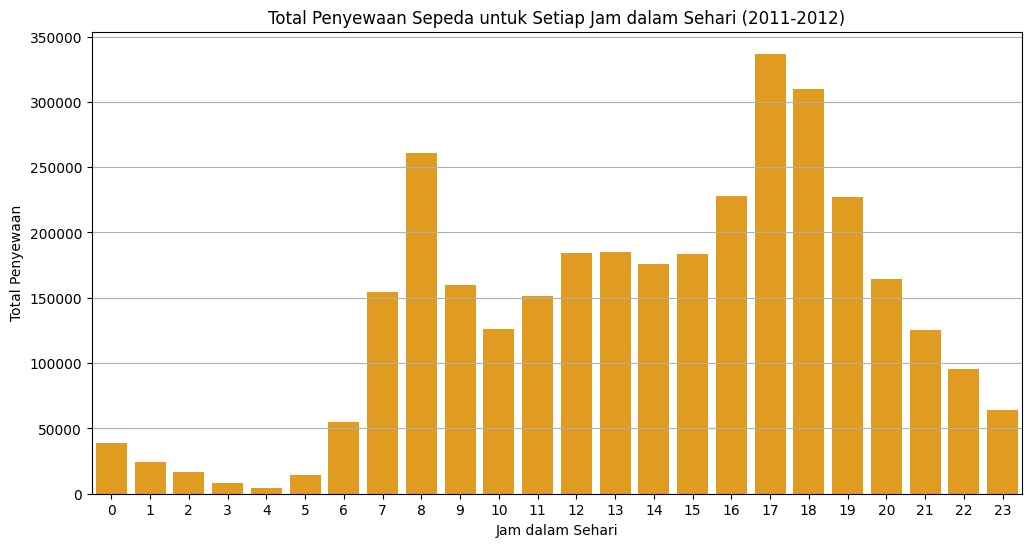

In [63]:
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

# Menentukan warna
colors = ['orange'] * len(hourly_rentals)

plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette=colors)
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Total Penyewaan')
plt.title('Total Penyewaan Sepeda untuk Setiap Jam dalam Sehari (2011-2012)')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


### Pertanyaan 3 : Pada musim apa total penyewaan sepeda paling banyak dan paling sedikit?

C:\Users\algha\AppData\Local\Temp\ipykernel_54220\2869364406.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=season_rentals, palette='coolwarm')


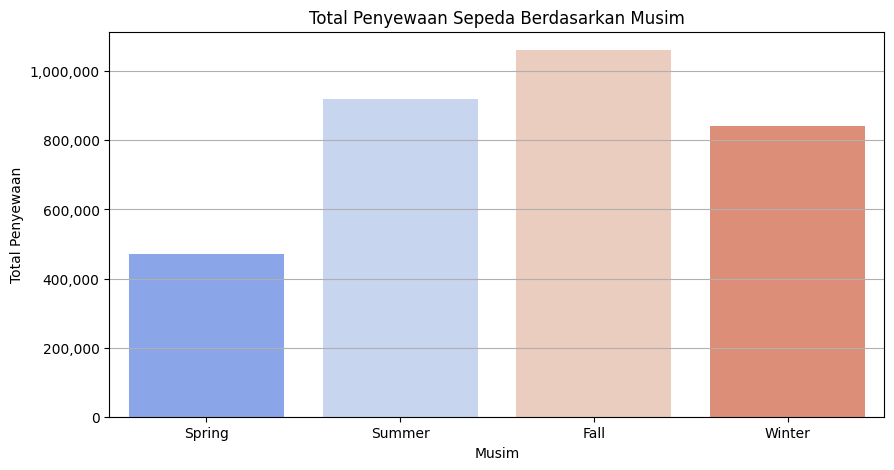

In [ ]:
season_rentals = day_df.groupby('season')['cnt'].sum().reset_index()
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rentals['season'] = season_rentals['season'].map(season_labels)

plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='cnt', data=season_rentals, palette='coolwarm')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.title('Total Penyewaan Sepeda Berdasarkan Musim (2011-2012)')
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

### Pertanyaan 4 : Bagaimana perbandingan total penyewaan sepedah pada holiday, workday, dan juga weekend

C:\Users\algha\AppData\Local\Temp\ipykernel_54220\3142063439.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=day_type_rentals, palette='pastel')


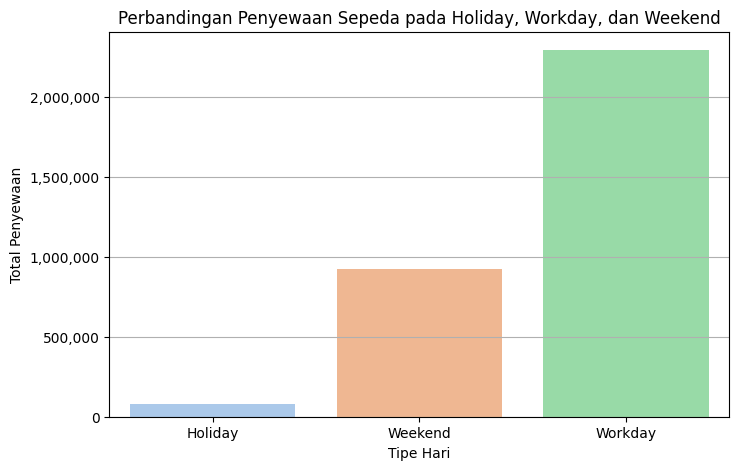

In [ ]:
day_df['day_type'] = day_df.apply(lambda row: 'Holiday' if row['holiday'] == 1 else ('Workday' if row['workingday'] == 1 else 'Weekend'), axis=1)
day_type_rentals = day_df.groupby('day_type')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='day_type', y='cnt', data=day_type_rentals, palette='pastel')
plt.xlabel('Tipe Hari')
plt.ylabel('Total Penyewaan')
plt.title('Perbandingan Penyewaan Sepeda Berdasarkan Tipe Hari (2011-2012)')
plt.grid(axis='y')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

## Conclusion

- Bagaimana tren total penyewaan sepeda untuk setiap bulan nya?


Berdasarkan grafik tren yang dihasilkan, terdapat perbedaan yang signifikan antara tahun 2011 dan tahun 2012. Total penyewaan sepeda pada tahun 2012 memiliki total penyewaan sepeda lebih banyak dibandingkan tahun 2011 bahkan di setiap bulannya. Dengan data ini kita bisa menghambil dugaan/hipotesa bahwa penyewaan sepeda mulai populer di tahun 2012

- Bagaimana tren total penyewaan sepeda untuk setiap jam nya?

Berdasarkan bar chart yang dihasilkan, total penyewaan sepeda paling banyak pada jam 17 (jam 5 sore), yang kedua terbesar pada jam 18 (jam 6 sore), dan yang ketiga terbesar pada jam 8 pagi. Dengan data ini kita bisa mengambil dugaan/hipotesa bahwa penyewan sepeda paling banyak di jam tersebut karena orang orang memilih menyewa sepeda untuk berangkat kerja (jam 8 pagi) dan pulang kerja (jam 5 atau 6 sore) 


- Pada musim apa total penyewaan sepeda paling banyak dan paling sedikit?


Berdasarkan bar chart yang dihasilkan, total penyewaan sepeda paling banyak pada musim gugur dan paling sedikit pada musim semi. Pada musim gugur cuaca nya cenderung lebih cocok untuk bersepedah sedangkan pada musim semi cuaca nya kurang cocok untuk bersepedah karena pada musim semi sering terjadi hujan

- Bagiamana perbandingan total penyewaan sepedah pada holiday, workday, dan juga weekend

Pada bar chart yang dihasilkan, total penyewaan sepeda paling banyak pada hari kerja. Dengan data ini sekaligus membuktikan hipotesa pada pertanyaan kedua bahwa orang orang lebih sering menggunakan transportasi sepeda untuk bekerja.